In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df= pd.read_csv("diabetes_clean.csv")
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Dsta separation as X and y

In [4]:
y = df["glucose"]


0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: glucose, Length: 768, dtype: int64

In [5]:
X=df.drop("glucose", axis=1)
X

,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,76,48,180,32.9,0.171,63,0
764,2,70,27,0,36.8,0.340,27,0
765,5,72,23,112,26.2,0.245,30,0
766,1,60,0,0,30.1,0.349,47,1


### data split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 100)

In [8]:
X_train

,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
660,10,84,0,0,27.7,0.182,54,0
69,4,85,27,100,28.9,0.189,27,0
85,2,74,29,125,32.4,0.698,27,0
219,5,66,0,0,37.8,0.261,41,1
712,10,62,36,0,41.2,0.441,38,1
...,...,...,...,...,...,...,...,...
578,10,68,0,0,27.0,0.245,36,0
53,8,90,34,300,33.7,0.467,58,1
350,4,80,0,0,42.2,0.237,29,0
79,2,66,22,0,25.0,0.307,24,0


In [9]:
X_test

,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
173,1,60,42,48,43.5,0.678,23,0
253,0,68,32,0,35.8,0.238,25,0
207,5,104,0,0,37.7,0.151,52,1
737,8,72,23,0,32.0,0.600,42,0
191,9,70,44,94,33.1,0.374,40,0
...,...,...,...,...,...,...,...,...
203,2,70,16,44,20.4,0.235,27,0
216,5,62,41,129,35.8,0.514,25,1
637,2,76,18,66,31.6,0.649,23,0
659,3,82,31,70,34.2,1.292,27,1


## model Building

### linear Regression

**Training the model**

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Applying the model to make a prediction**

In [14]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)


In [16]:
y_lr_train_pred

array([117.97897699, 109.63702325, 112.46324062, 140.8395335 ,
       128.51859717, 108.3327447 ,  98.33944877, 111.47299204,
       134.91964466, 109.11730081, 123.61172391, 111.26301269,
       152.10870112, 108.41554369, 112.37569113,  98.88464523,
       111.37870558, 155.18622263, 139.11844915, 106.17803435,
       148.43988278, 103.97397134, 142.36749222, 107.29863372,
       138.74692816, 111.40562396, 110.71770824,  98.76214479,
       117.35301386, 106.59077459, 147.03736683, 102.43488071,
        99.45419227, 118.45317324, 157.3271816 , 143.47855725,
       154.83547834, 107.7252079 , 123.9044754 , 108.25876169,
       104.61933556, 108.58791685,  98.62091067, 146.02649518,
       113.08280755, 130.5483544 , 130.70986701, 126.35913681,
       110.74448706, 109.7331752 , 127.61101007, 104.44552867,
       132.69854325, 119.02910532, 103.42087054, 108.13785074,
       103.29063978, 136.56949384, 134.23007695, 148.03222749,
       149.95545445, 147.80053292, 109.63327474, 143.42

In [17]:
y_lr_test_pred

array([102.19710556, 100.33861457, 149.94621711, 107.60754656,
       107.91157272, 133.08057937, 139.86309647, 128.6216273 ,
       149.80765154, 111.10413775, 109.47027029, 137.07272795,
       123.14611491, 101.65693941, 106.55982095, 109.15917583,
       106.42105277, 138.2051887 , 140.23983922, 109.02543851,
       125.68303849, 102.70216831, 165.42471539, 159.9336681 ,
       110.01792133, 143.39126625, 136.57935839, 108.3087773 ,
       132.80282567, 149.31499328, 109.30909447, 163.65765235,
       104.71951779, 124.76070421, 131.53617366, 120.29502946,
       158.59539777,  97.79908985, 138.14200263, 132.19559784,
       127.41552894, 124.40684119, 149.5153868 , 105.66806501,
       125.25155896, 153.91293625, 106.85572026, 113.20876818,
       137.33223171, 110.83094478, 117.46297046, 107.33330421,
       137.75192331, 136.01953869, 115.89773699, 148.32202429,
       130.70308353, 103.47972804, 125.72645137,  99.44469397,
       110.33168905, 109.708167  , 144.20833076,  97.84

**Evaluate Model Performance**

In [18]:
y_train

660    162
69     146
85     110
219    112
712    129
      ... 
578    133
53     176
350     92
79     112
520     68
Name: glucose, Length: 614, dtype: int64

In [ ]:
y_lr_train_pred

In [21]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [26]:
print("LR MSE (Train): ", lr_train_mse)
print("LR R2 (Train): ", lr_train_r2)
print("LR MSE (Test): ", lr_test_mse)
print("LR R2 (Test): ", lr_test_r2)


LR MSE (Train):  677.3753646833958
LR R2 (Train):  0.3423787273719078
LR MSE (Test):  643.5909452933428
LR R2 (Test):  0.3461031204286672


In [28]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns=["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,677.375365,0.342379,643.590945,0.346103


### creating regression fromula for each and every other column

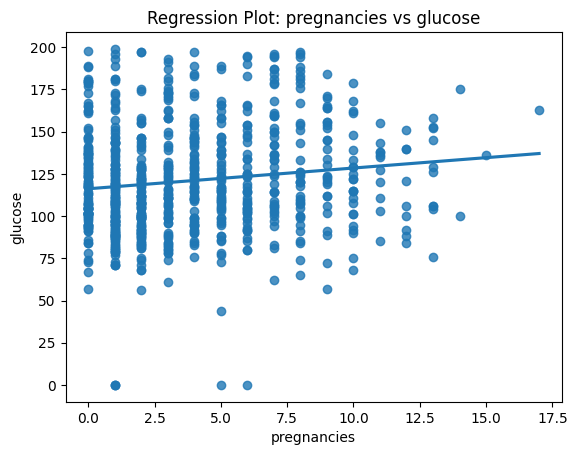

Regression formula for pregnancies vs glucose: glucose = 116.17 + 1.23 * pregnancies


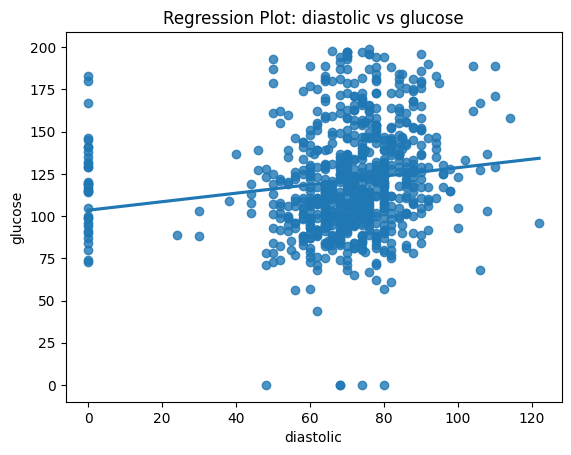

Regression formula for diastolic vs glucose: glucose = 103.48 + 0.25 * diastolic


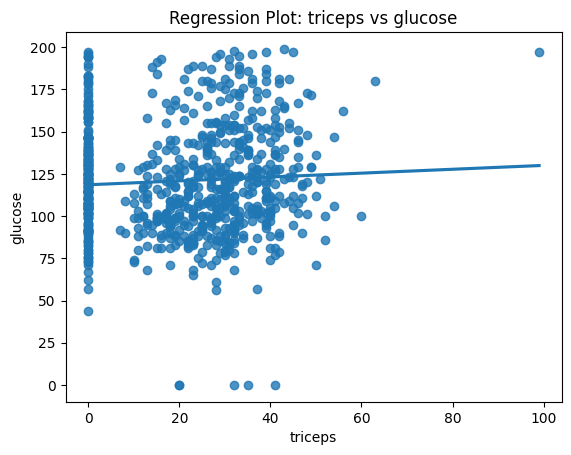

Regression formula for triceps vs glucose: glucose = 118.53 + 0.11 * triceps


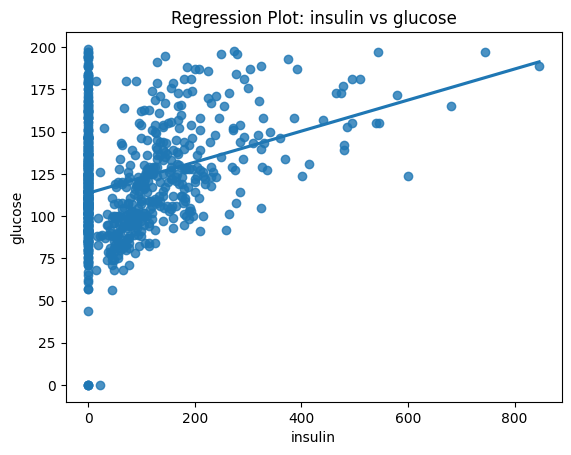

Regression formula for insulin vs glucose: glucose = 113.56 + 0.09 * insulin


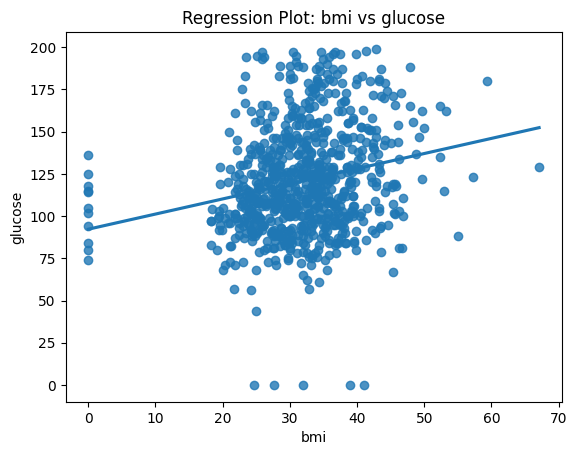

Regression formula for bmi vs glucose: glucose = 92.21 + 0.90 * bmi


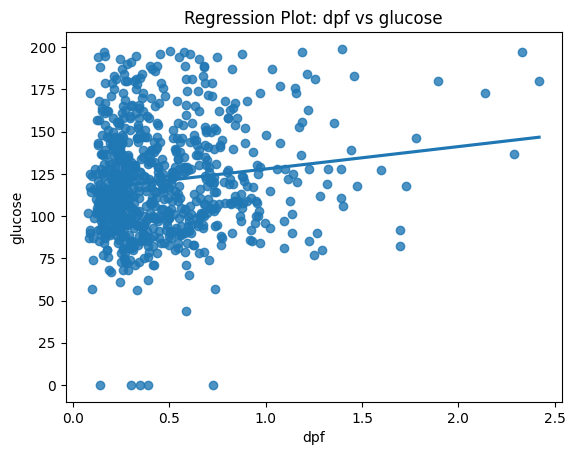

Regression formula for dpf vs glucose: glucose = 114.64 + 13.25 * dpf


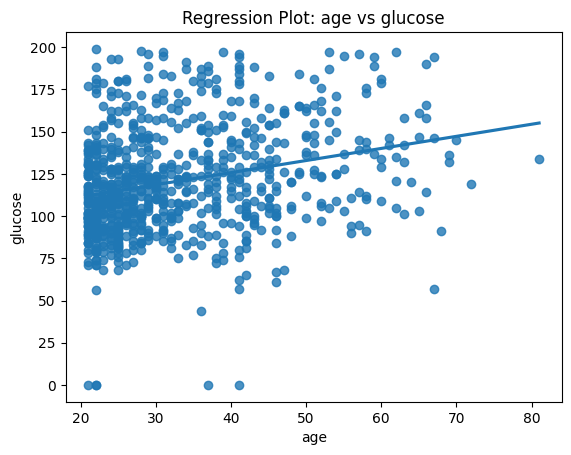

Regression formula for age vs glucose: glucose = 97.08 + 0.72 * age


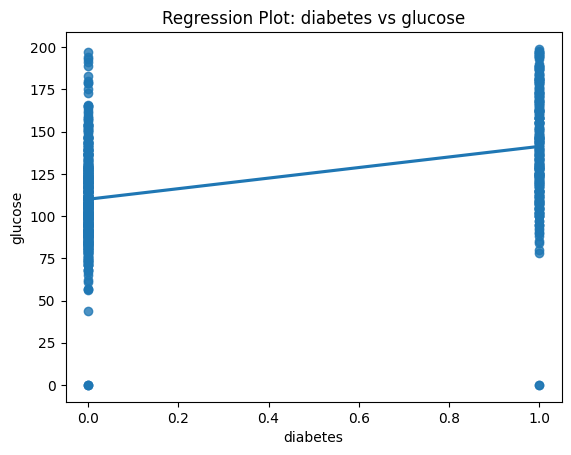

Regression formula for diabetes vs glucose: glucose = 109.98 + 31.28 * diabetes


In [32]:
features = df.columns.drop('glucose')

for feature in features:
    sns.regplot(x=df[feature], y=df['glucose'], ci=None)
    plt.title(f'Regression Plot: {feature} vs glucose')
    plt.xlabel(feature)
    plt.ylabel('glucose')
    plt.show()

    X = df[[feature]]
    y = df['glucose']
    model = LinearRegression().fit(X, y)
    intercept = model.intercept_
    slope = model.coef_[0]

    print(f'Regression formula for {feature} vs glucose: glucose = {intercept:.2f} + {slope:.2f} * {feature}')
